In this notebook, I obtain the words from spring 2018 schedule megathred from r/UIUC, and graph the frequency of each word. This can then in the end be used to compare the frequency of a variety of words, and some interesting conclusions are drawn!

In [34]:
%matplotlib inline

import praw #import the reddit wrapper class
import pandas
import matplotlib
from collections import Counter

In [35]:
reddit = praw.Reddit(user_agent='Comment Extraction (by /u/USERNAME)',
                     client_id='MzP2Nwj9ntK6UQ', client_secret="pc7UJvP9yEgrKzJHXDHiBE3rIP4",
                     username='farpista', password='Bratik123') #create a reddit instance

In [36]:
# Create a submission object that holds details of a specific post
submission = reddit.submission(id='79lznp') 

In [37]:
words ={}
#Gathering data and cleaning it up
for i in range(len(submission.comments)):
    tmp = submission.comments[i].body.split(" ")
    for k in range(len(tmp)):
        if(tmp[k].replace('\n','') not in words):
            words[tmp[k].replace('\n','')] = 0
        words[tmp[k].replace('\n','')] += 1

In [38]:
# Making a dictionary that contains the most frequent words
# PS: The threshold here is contained to be 30. An algorithm could probably be written to optimize ths process,
# but according to me that is out of the scope of this project.
highestWords = {}
words.pop(" ",None)
words = Counter(words)
for k in words:
    if words[k] > 50:
        highestWords[k] = words[k]
#Making a data frame that contains most frequent words.
dataFrame=pandas.Series(highestWords, name = "Distribution of words on the UIUC subreddit's Spring megathread")

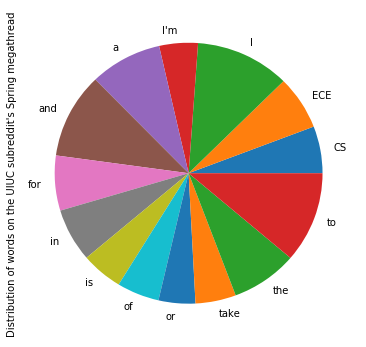

In [39]:
# Plotting a 6x6 pie chart for the data frame we just created.
dataFrame.plot.pie(figsize=(6, 6))

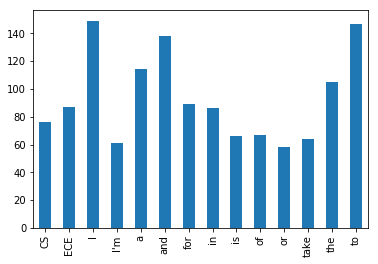

In [40]:
# Plotting a bar plot for more detailed information.
dataFrame.plot.bar()

From this plotting, some interesting observations can be made. For instance, we can see that "ECE" and "CS" are the most occuring words in this post. This demonstrates how dominant these majors are on the UIUC subreddit. Another interesting observation is that words like "or", "take" and "is" are used less than "ECE" and "CS"!